# Practical Assessment 2. Modeling and solving scheduling problems (50 pts)
The University of Melbourne has bought a new supercomputer that will allow all their students and researchers to run complex simulations and programs to advance their research activities. Everyone wants to use it as it will accelerate the research process. To keep track and organize the supercomputer's access, the IT department has created an online form that requests the following information:

- Researcher ID.
- School.
- Desired start time for the activity (Hour:Minute:Second).
- Duration of the program (seconds).
- School evaluation for the activity [1 - 10].

The file Requests.csv contains all the different requests that the IT department has obtained for the first day. In this assessment, we will consider various scenarios, and you will assist them in selecting an adequate schedule.

---

### Question 1. (5 pts)
Calculate the **finish time** for all the requests and append them as a new column with time format (e.g., '10:35:00') to the data frame you will obtain by reading the .csv file.

In [209]:
import pandas as pd

# Function to convert a string %H:%M:%S to seconds
def Time2Sec(string):
    # We separate the string using the character ':'
    t = string.split(':')
    seconds = (int(t[0]) * 3600) + (int(t[1]) * 60) + int(t[2])
    return (seconds)

# Function to convert seconds to a string %H:%M:%S
def Sec2Time(sec):
    # Convert to %H:%M:%S
    seconds = sec % (24 * 3600) 
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    string = "{:02d}:{:02d}:{:02d}".format(hours, minutes, seconds)
    return(string)

data = pd.read_csv("Requests.csv")

finish = []
# iterate through the data, and find the finish time by adding duration to start time
for i in range(0, len(data)):
    start_time = data.at[i, 'Start']
    start_time = Time2Sec(start_time)
    
    duration = data.at[i, 'Duration']
    
    finish_time = start_time + duration
    finish_time = Sec2Time(finish_time)
    finish.append(finish_time)
    
data.insert(3, 'Finish', finish)
data

,ID,School,Start,Finish,Duration,Evaluation
0,354402,BioSciences,11:48:57,12:08:31,1174,10
1,293203,Mathematics and Stadistics,09:04:23,09:44:54,2431,2
2,462434,Physics,14:09:48,15:04:16,3268,2
3,382345,BioSciences,11:31:16,11:57:05,1549,6
4,287837,Geography,11:01:03,11:52:05,3062,7
...,...,...,...,...,...,...
95,628994,Ecosystem and Forest Sciences,13:44:19,14:05:40,1281,2
96,456146,Chemistry,11:33:59,12:30:02,3363,7
97,799436,Geography,12:02:03,12:21:04,1141,8
98,761301,Geography,13:22:45,14:02:22,2377,1


### Question 2. (5 pts)
There are too many petitions on the list, and it is impossible to execute all of them. You need to maximize the number of petitions that will be executed this day **without considering the school's evaluation criteria**. How many petitions will be executed? 

In [210]:
# Sort dataframe by Finish time
data.sort_values(by = ['Finish'], inplace = True, ascending = True)
data = data.reset_index(drop = True)

# Insert the first petition into a list
accepted = []
accepted.append(data.at[0, 'Finish'])

# compare each start time to the last accepted finish time
# if start time is after finish time, accept
for i in range(1, len(data)):
    start_time = data.at[i, 'Start']
    start_time = Time2Sec(start_time)
    
    finish_time = accepted[-1]
    finish_time = Time2Sec(finish_time)
    
    if (start_time >= finish_time):
        accepted.append(data.at[i, 'Finish'])

print(len(accepted), "petitions will be executed")

17 petitions will be executed


### Question 3. (5 pts)
In Question 2 you have calculated the total number of petitions that can be executed in one day. Which researchers will get a slot to run their simulations? Generate a list with the Researcher ID of the researchers that will get a slot.

In [211]:
# Sort dataframe by Finish time
data.sort_values(by = ['Finish'], inplace = True, ascending = True)
data = data.reset_index(drop = True)

# Insert the first petition into a list
accepted = []
accepted_ID = []
accepted.append(data.at[0, 'Finish'])

# compare each start time to the last accepted finish time
# if start time is after finish time, accept
for i in range(1, len(data)):
    start_time = data.at[i, 'Start']
    start_time = Time2Sec(start_time)
    
    finish_time = accepted[-1]
    finish_time = Time2Sec(finish_time)
    
    if (start_time >= finish_time):
        accepted_ID.append(data.at[i, 'ID'])
        accepted.append(data.at[i, 'Finish'])

print(accepted_ID)# Type your code here

[530699, 375872, 192389, 751308, 819524, 832310, 566773, 684776, 498150, 982043, 652802, 841320, 939727, 126427, 610274, 778723]


### Question 4. (5 pts)
We define p(j) as the largest index i < j such that job i is compatible with j. Calculate the p-value for each of the data frame jobs and append this information as a new column. **Remember that before calculating the p-value, we need to sort the data frame in a particular way**. Also, it is important to note that the first request will have index 0 in Python. One solution to deal with this issue could be to use a different number (e.g., -1) to refer to the jobs that have not compatible jobs before them.

In [212]:
# Note: We know that the first request does not have a compatible request before it, so we initialize the p list with -1 for the request 0, 
# and we start analyzing from request 1
p = [-1] 

for i in range(1, len(data)):
    start_time = data.at[i, 'Start']
    start_time = Time2Sec(start_time)
    
    # compare the current start time to the previous finish time,
    # if prev_time > start_time, append the index to p
    for j in range(i-1, -1, -1):
        prev_time = data.at[j, 'Finish']
        prev_time = Time2Sec(prev_time)
        
        if start_time >= prev_time:
            p.append(j)
            break

#print(p==p_help)
data.insert(6, 'p(j)', p)

### Question 5. (5 pts)
Instead of maximizing just the number of petitions executed in one day, the University wants to consider also the importance of the research work evaluating all the petitions from 1 to 10. In this scenario, what is the maximum value (weight) that we would be able to obtain? 

In [213]:
# Type your code here (Hint: bottom-up approach would be easier to codify)

# In case you couldn't solve the previous question, you can use the following array, where -1 means that there are not compatible 
# jobs before them. Note that it has been calculated with the jobs sorted in a specific way.
p_help = [-1, 0, 1, 1, 3, 3, 3, 3, 3, 5, 5, 8, 6, 8, 5, 6, 6, 5, 6, 8, 12, 17, 9, 17, 12, 11, 20, 20, 17, 
         17, 26, 23, 28, 20, 30, 23, 23, 30, 30, 31, 29, 33, 38, 38, 40, 30, 38, 32, 32, 38, 41, 31, 33, 
         33, 32, 38, 41, 56, 52, 56, 56, 57, 55, 57, 56, 57, 57, 59, 56, 59, 60, 56, 57, 59, 60, 71, 60, 
         61, 72, 65, 61, 73, 69, 73, 77, 70, 69, 74, 80, 81, 73, 81, 78, 81, 82, 92, 94, 95, 97, 97]

OPT = [0]
chosen_requests = []
for i in range(0, len(data)):
    pj = data.at[i, 'p(j)']
    
    optPJ = OPT[pj]
    curr_value = data.at[i, 'Evaluation']
    
    # Since OPT has an extra value 0 at the beginnning, we use OPT[i] instead of OPT[i-1]
    chosen = max(curr_value + optPJ, OPT[i])
    OPT.append(chosen)

print("Maximum value (weight) that we would be able to obtain is", max(OPT))
#print(OPT)

Maximum value (weight) that we would be able to obtain is 106


### Question 6. (7.5 pts)
In Question 5 you have calculated the total value (weight) that you can obtain in one day. Which researchers will get a slot to run their simulations? Generate a list with the Researcher ID of the researchers that will get a slot.

In [214]:
def find_solution(j):
    i = j-1
    pj = data.at[i, 'p(j)']
    if i==0:
        return 0
    elif ((data.at[i, 'Evaluation'] + OPT[pj]) > OPT[i]):
        count = data.at[i, 'Evaluation']
        id.append(data.at[i, 'ID'])
        find_solution(pj)
    else:
        find_solution(i)
        
id = []
find_solution(len(OPT)-1)
id.append(data.at[0, 'ID'])
print(id)

[778723, 126427, 690633, 160158, 286979, 982043, 959617, 919052, 566773, 168373, 987167, 344653, 375872, 197362]


### Question 7. (5 pts)
We have installed a software that will allow us to create multiple execution threads. With this new software, we will be able to execute various programs simultaneously in the supercomputer. What is the minimum number of threads will we need to schedule all the programs?

In [228]:
data.sort_values(by = ['Start'], inplace = True, ascending = True)
data = data.reset_index(drop = True)

num_thread = 1
finish_time = data.at[0, 'Finish']
finish_time = Time2Sec(finish_time)

# insert the earliest section into the first thread
# thread_dict = {thread number: finish time}
thread_dict = {1:finish_time}

for i in range(1, len(data)):
    start_time = data.at[i, 'Start']
    start_time = Time2Sec(start_time)
    
    finish_time = data.at[i, 'Finish']
    finish_time = Time2Sec(finish_time)
    
    # find the earliest finish time
    earliest_finish = thread_dict[1]
    thread = 1
    for j in range(1,len(thread_dict)+1):
        if thread_dict[j] < earliest_finish:
            earliest_finish = thread_dict[j]
            thread = j
    
    if earliest_finish < start_time:
        thread_dict[thread] = finish_time
        
    else:
        thread_dict[len(thread_dict)+1] = finish_time
        num_thread += 1

print(num_thread, "threads needed to schedule all the programs.")

16 threads needed to schedule all the programs.


### Question 8. (7.5 pts) 
Which tasks are scheduled in each thread of question 7?

In [229]:
data.sort_values(by = ['Start'], inplace = True, ascending = True)
data = data.reset_index(drop = True)

num_thread = 1
finish_time = data.at[0, 'Finish']
finish_time = Time2Sec(finish_time)

# insert the earliest section into the first thread
# thread_dict = {thread number: finish time}
thread_dict = {1:finish_time}
thread_id = {1:[data.at[0,'ID']]}

for i in range(1, len(data)):
    start_time = data.at[i, 'Start']
    start_time = Time2Sec(start_time)
    
    finish_time = data.at[i, 'Finish']
    finish_time = Time2Sec(finish_time)
    
    # find the earliest finish time
    earliest_finish = thread_dict[1]
    thread = 1
    for j in range(1,len(thread_dict)+1):
        if thread_dict[j] < earliest_finish:
            earliest_finish = thread_dict[j]
            thread = j

    if earliest_finish < start_time:
        thread_dict[thread] = finish_time
        thread_id[thread].append(data.at[i,'ID'])
        
    else:
        thread_dict[len(thread_dict)+1] = finish_time
        num_thread += 1
        thread_id[len(thread_id)+1] = [data.at[i, 'ID']]
        
for thread in thread_id.items():
    print("{} is scheduled in thread number {}".format(thread[1],thread[0]))

[197362, 530699, 375872, 192389, 125035, 131295, 619863, 650940, 286979, 160158, 965302] is scheduled in thread number 1
[460847, 344653, 459051, 398010, 686441, 169844, 246638, 421682, 778723] is scheduled in thread number 2
[688568, 987167, 168373, 566773, 919052, 369672, 982043, 474559, 395041] is scheduled in thread number 3
[293203, 223827, 832310, 684776, 498150, 437870, 393104, 376795] is scheduled in thread number 4
[642824, 498335, 124449, 225285, 370963, 267579, 628994, 610274] is scheduled in thread number 5
[751308, 150793, 592789, 957455, 131435, 833943, 520121] is scheduled in thread number 6
[417863, 765873, 582948, 459958, 529331, 827348] is scheduled in thread number 7
[289300, 819524, 683221, 456146, 665146, 853019] is scheduled in thread number 8
[138771, 180149, 287837, 799436, 513237, 761301, 126427] is scheduled in thread number 9
[201974, 203359, 382345, 934569, 494532, 798361] is scheduled in thread number 10
[134574, 752648, 842008, 631338, 825496] is scheduled

### Question 9. (5 pts)
Create a bar graph to represent the number of programs running on the supercomputer per hour if you have an unlimited number of threads to execute all of them. It would be best if you considered the start time and duration of each job to correctly compute how much programs are executed in an interval of time. Which conclusions do you extract from this graph? Which guidelines should the IT department recommend to have regular use of the computer instead of short periods of high occupation?

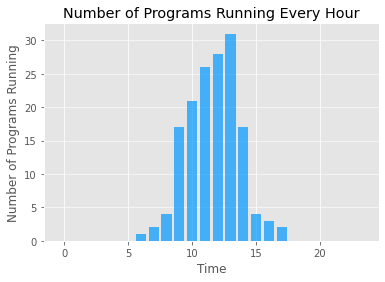

In [217]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Create an hours variable and increment +1 the hours that have a program in execution
hours = np.zeros(24)
for i in range(0, len(data)):
    start = data.at[i, 'Start']
    start = Time2Sec(start)
    
    duration = data.at[i,'Duration']
    finish = start + duration
    
    start = start/3600
    finish = finish/3600
    
    # round down the start time and round up the finish time
    hours[math.floor(start):math.ceil(finish)] += 1
    
# Using the graph function we can create the figure
plt.style.use('ggplot')
plt.bar(range(0, 24), hours, color='#0099ff', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time')
plt.ylabel('Number of Programs Running')
plt.title('Number of Programs Running Every Hour')
plt.show()

Response: We can see from the bar chart that most people requests to use the supercomputer between 11am to 2pm, whereas there are only a few people who wants to use the supercomputer between 6am to 10am and 2pm to 5pm.
The IT department can set up a booking list for the university and allows a certain number of users to book and use the supercomputer at certain times.
For example, a user can book the supercomputer for 3 hours maximum, and each hour only 10 users are allowed to use the supercomputer.